In [5]:
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
eps = np.finfo("float").eps

plt.style.use(["science", "ieee"])
out_path = osp.join("../outputs/figures")
metric_res_dicts_path = osp.join(out_path, "metric_res_dicts.npy")


In [6]:
metric_res_dicts= np.load(metric_res_dicts_path,allow_pickle=True).item()

In [7]:
datasets = ['Pinterest','MovieLens', 'Clothing', 'Toys']

# Plot performance

In [8]:
from omegaconf import OmegaConf
import sys
sys.path.append('../src')

def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

def build_paths(results_path):
    res_dict = OmegaConf.load(results_path)

    # Build absolute path
    res_dict = {
        key: osp.join(res_dict["base_path"], value)
        for key, value in res_dict.items()
        if key != "base_path"
    }

    return  {key: value for key, value in res_dict.items() if "_cf" not in key}

def load_labels(base_path):
    res_dict = build_paths(base_path)
    labels = np.load(osp.join(list(res_dict.values())[0], "labels.npy"))
    return labels

In [9]:
dataset_mapping = {
    "Toys_and_Games": "Toys",
    "Clothing_Shoes_and_Jewelry": "Clothing",
    "movielens": "MovieLens",
    "pinterest": "Pinterest",
}

label_dict = {}
for dataset_name, print_name in dataset_mapping.items():
    print(dataset_name)
    label_dict[print_name] = load_labels(
        osp.join(f"../outputs/{dataset_name}/results.yaml")
    )


Toys_and_Games
Clothing_Shoes_and_Jewelry
movielens
pinterest


Pinterest 1.0 0.48002755641937256
MovieLens 2.028903550109959 0.507033300190706
Clothing 3.21918415607449 0.7381935156707278
Toys 1.2802351623740202 0.5830721383968704


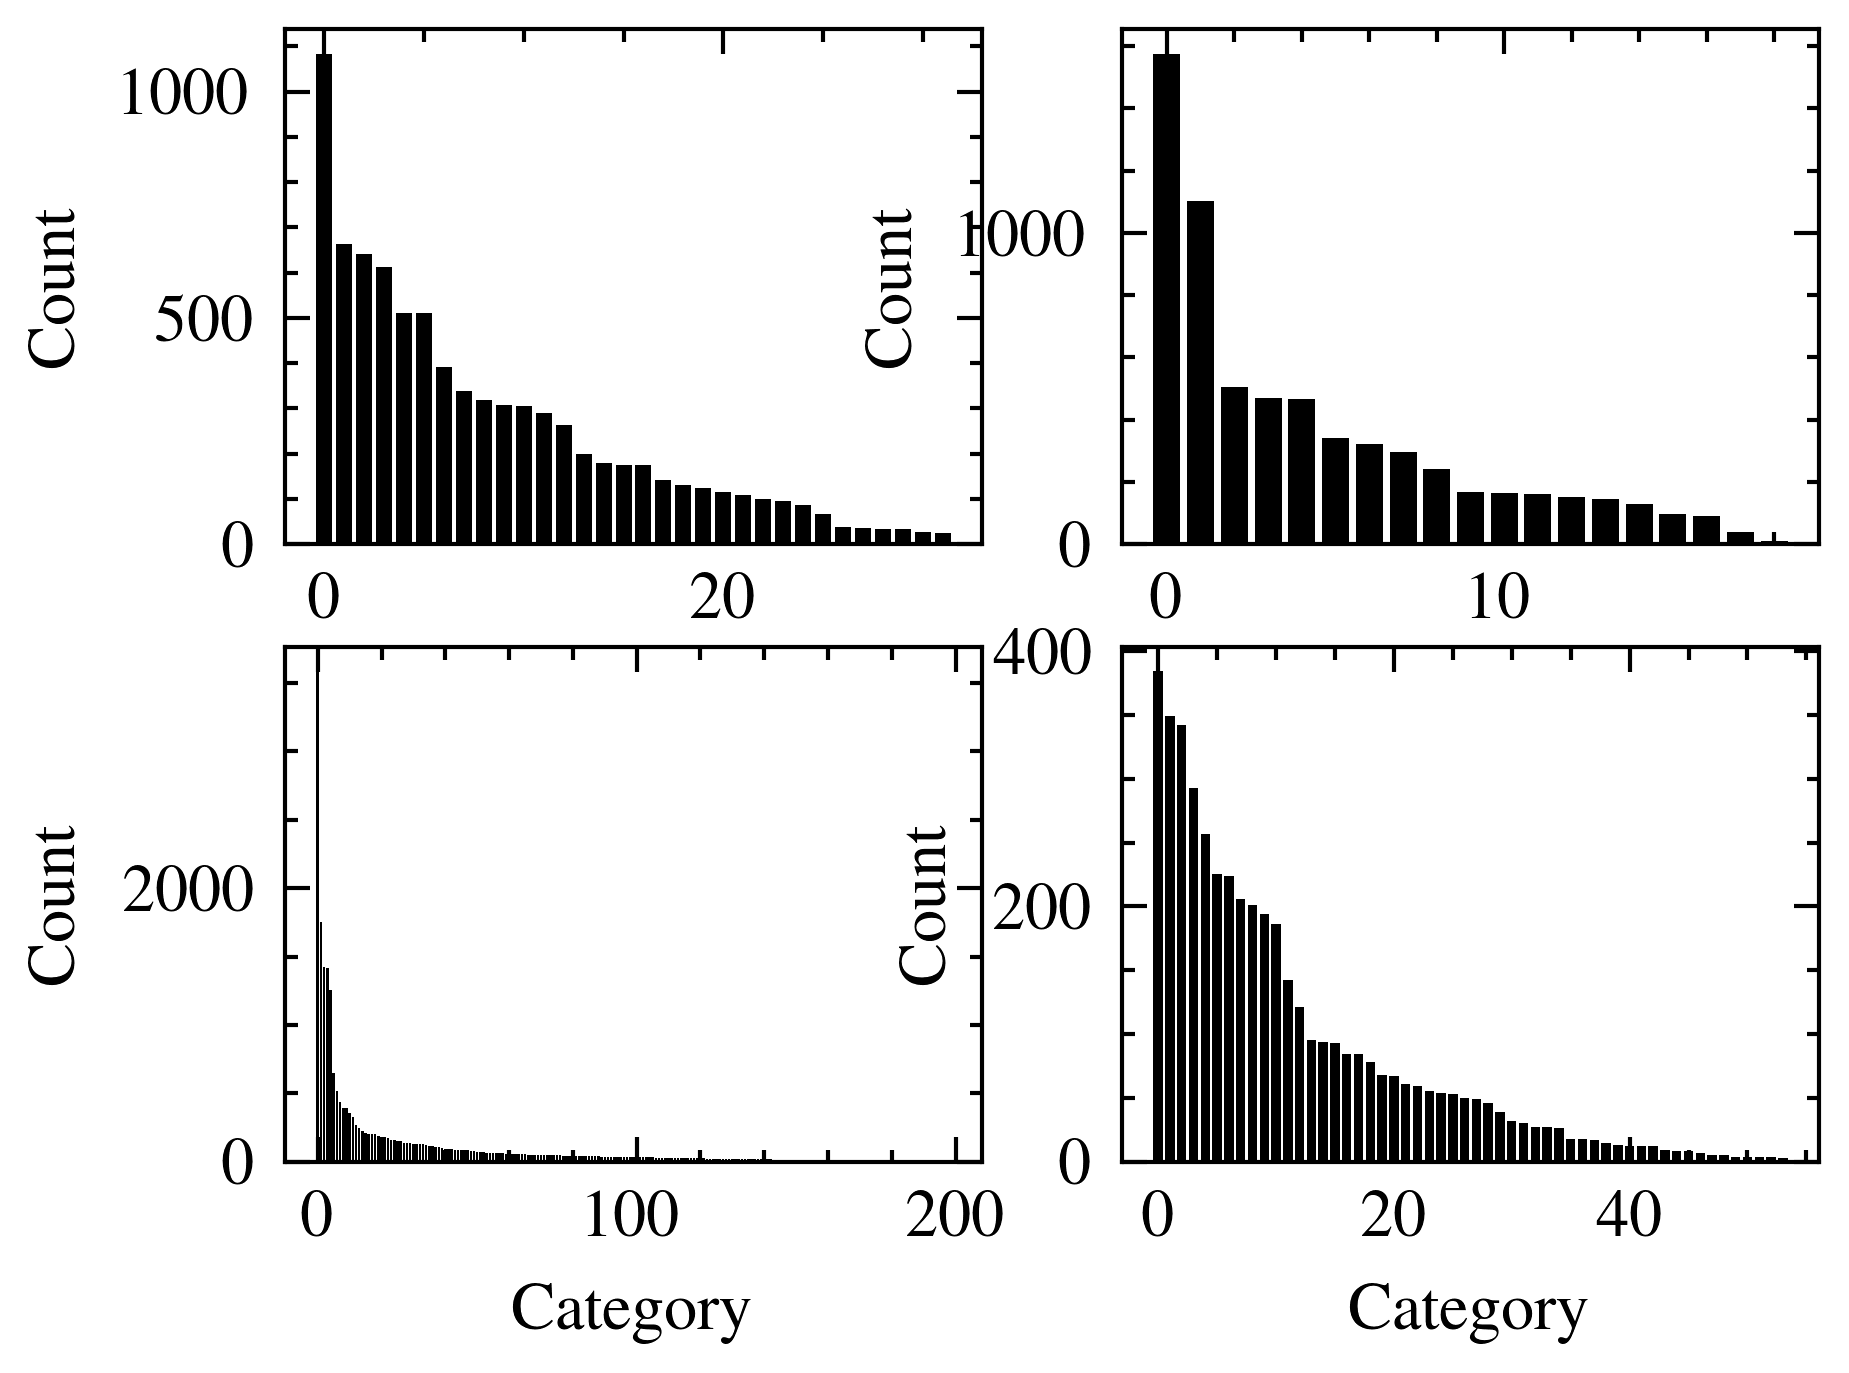

In [15]:
fig,axs = plt.subplots(2,2)

axs = axs.flatten()
for i, dataset_name in enumerate(datasets):
    labels = label_dict[dataset_name]
    count = labels.sum(axis=0)
    count.sort()

    ax = axs[i]
    ax.bar(np.arange(len(count)),count[::-1])
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')

    print(f'{dataset_name} {labels.sum(axis=1).mean()} {gini(count)}')

plt.tight_layout()
plt.savefig(osp.join(out_path,f'{dataset_name}_label_count.pdf'))
plt.show()